In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from config_reader import Config
cfg = Config()

In [2]:
data = pd.read_csv("../results/" + cfg.mode + "/" + cfg.metric + ".csv")

In [3]:
data = data[:-1]

In [4]:
data

,Id,Description,Filename,Hyperparameters,Resulting_hyperparameters,BA_train,BA_test,F1_train,F1_test,G_train,...,fpr_test,tpr_train,tpr_test,auc_train,auc_test,Comment,Conf_mx_train_row1,Conf_mx_train_row2,Conf_mx_test_row1,Conf_mx_test_row2
0,1,First network (10 epochs) with following layer...,[ 2079 88874],[ 1 60],[ 550 22179],0.499531,0.499558,0.002612,0.003268,0.883096,...,0.002698,0.001441,0.001815,0.499397,0.499447,Pretty nice.,Cyclone.ipynb,"(12, 0.5, 1.0, 50.0, 2.0)","[0.09661467731855458, 1.334568647990471, 50.26...",[ 3 212]
1,2,"Same network, doubled the batch_size.",[ 2079 88874],[ 1 60],[ 550 22179],0.499531,0.499558,0.002612,0.003268,0.883096,...,0.002698,0.001441,0.001815,0.496996,0.489997,Surprised statistics are unchanged,Cyclone_bs24.ipynb,"(24, 0.5, 1.0, 50.0, 2.0)","[0.12521979419695492, 1.3075537683656253, 50.2...",[ 3 212]
2,3,"Decreased amount of weights. w*b = d, a*b = e....",[ 2009 84125],[ 27 1198],[ 524 21041],0.489687,0.497566,0.020517,0.030405,18.885381,...,0.053869,0.035062,0.049002,0.443909,0.446057,"Crazy improvement on accuracy, but loss is ver...",Cyclone_bs24_de.ipynb,"(24, 25.0, 50.0, 2.0)","[13.037692023999936, 61.88511665572733, 8.5532...",[ 73 4961]
3,4,#8 but inrodcued a fully connected layer inste...,[ 335 20806],[ 451 17121],[ 100 5118],0.536323,0.524324,0.048454,0.049771,65.362534,...,0.769864,0.839097,0.818512,0.491046,0.483353,NaN,Cyclone_bs24_de_fc.ipynb,"(24, 25.0, 50.0)","[18.827808108107057, 56.04428431599529, 0.0013...",[ 1747 68280]
4,5,#12 but added additional layer with N neurons.,[ 1058 46652],[ 271 10707],[ 280 11532],0.507754,0.505191,0.044971,0.047012,1.960015,...,0.481452,0.491835,0.491833,0.503824,0.499075,NaN,Cyclone_bs24_de_fc_50.ipynb,"(24, 25.0, 50.0)","[25.06624441679342, 50.516991386759706, -0.192...",[ 1024 42434]
5,6,"Decreased amount of weights. w*b = d, a*b = e....",[ 1329 48854],[ 200 9979],[ 351 12260],0.455031,0.457130,0.034969,0.037279,67.648752,...,0.448716,0.361671,0.362976,0.450553,0.452284,Surprised it performed worse than #8 (multiple...,Cyclone_bs24_de_individual_d.ipynb,"(24, 25, 50.0, 2.0)","[22.496400661549284, 53.66961838102461, 5.6092...",[ 753 40232]
6,7,#8 but with maxpooling kernel = 4,[ 2027 84982],[ 24 1003],[ 527 21236],0.490175,0.499228,0.017625,0.030418,21.072280,...,0.045101,0.026417,0.043557,0.443814,0.445480,Loss around 50.,Cyclone_bs24_de_mpk4.ipynb,"(24, 25.0, 50.0, 2.0)","[13.13906744033071, 61.781858253652835, 9.2981...",[ 55 4104]
7,8,#8 but with maxpooling kernel = 6,[ 1509 56875],[ 142 7973],[ 409 14266],0.456822,0.449599,0.032869,0.032772,68.591531,...,0.358514,0.275216,0.257713,0.448474,0.445478,Loss around 30.,Cyclone_bs24_de_mpk6.ipynb,"(24, 25.0, 50.0, 2.0)","[21.86816512083913, 53.11608175041815, 5.52788...",[ 573 32211]
8,9,"Decreased amount of weights. w*b = d, a*b = e....",[ 2082 89086],[0 0],[ 551 22239],0.500000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.499531,0.499558,NaN,Cyclone_bs24_de_small_weights.ipynb,"(24, 0.5, 1.0, 1.0)","[0.018120616379523186, 1.3342470247407816, 0.1...",[0 0]
9,10,"Kept batch_size=24. Fixed a, b, c and taught o...",[ 2079 88937],[ 1 46],[ 550 22193],0.499884,0.499873,0.002686,0.003344,0.068679,...,0.002068,0.001441,0.001815,0.488725,0.495167,"Unsuprusingly, accuracy dropped. Suprisingly, ...",Cyclone_bs24_fixed_a_b_c.ipynb,"(24, 0.5, 1.0, 50.0, 2.0)",[0.0944691229203729],[ 3 149]


In [5]:
data['Filename'].values

array(['[ 2079 88874]', '[ 2079 88874]', '[ 2009 84125]', '[  335 20806]',
       '[ 1058 46652]', '[ 1329 48854]', '[ 2027 84982]', '[ 1509 56875]',
       '[ 2082 89086]', '[ 2079 88937]', '[ 2079 88937]', '[ 2079 88937]',
       '[ 1966 82966]', '[ 2079 88866]'], dtype=object)

In [6]:
names = data['Filename'].values.tolist()
names = [name.strip('.ipynb') for name in names]

fpr_test = data['fpr_test']
tpr_test = data['tpr_test']
fpr_train = data['fpr_train']
tpr_train = data['tpr_train']

indices = data['Id'].values.tolist()[:-1]

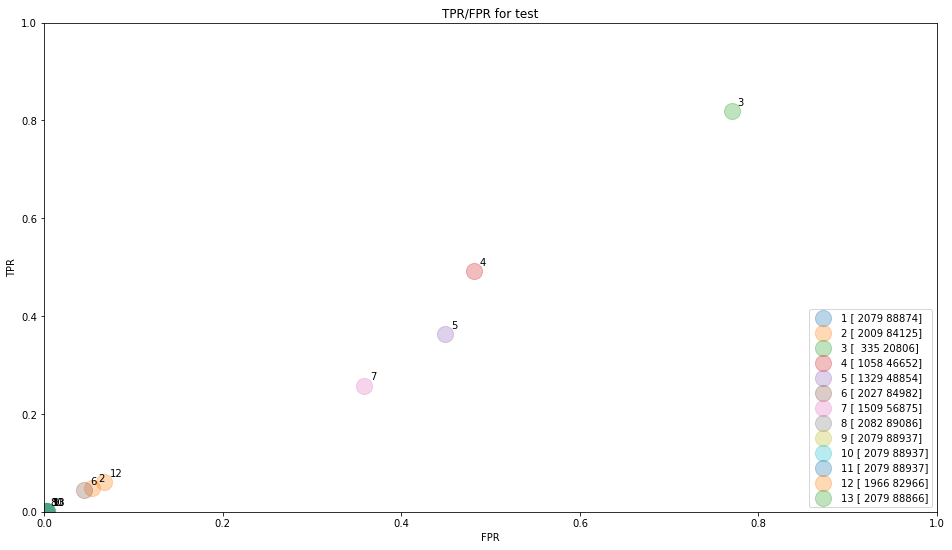

In [7]:
plt.rcParams["figure.figsize"] = (16, 9)
fig, ax = plt.subplots()

#indices=[1, 2, 3, 4]

ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
for i in indices:
    ax.scatter(x=fpr_test[i], y=tpr_test[i], alpha=0.3, label=str(i) + " " + names[i], marker='o', s=260)
    ax.annotate(str(i), (fpr_test[i], tpr_test[i]), xytext=(6, 6), textcoords='offset pixels', size=10)
    
ax.set_title("TPR/FPR for test")
ax.set_ylabel("TPR")
ax.set_xlabel("FPR")
ax.legend(loc=4)

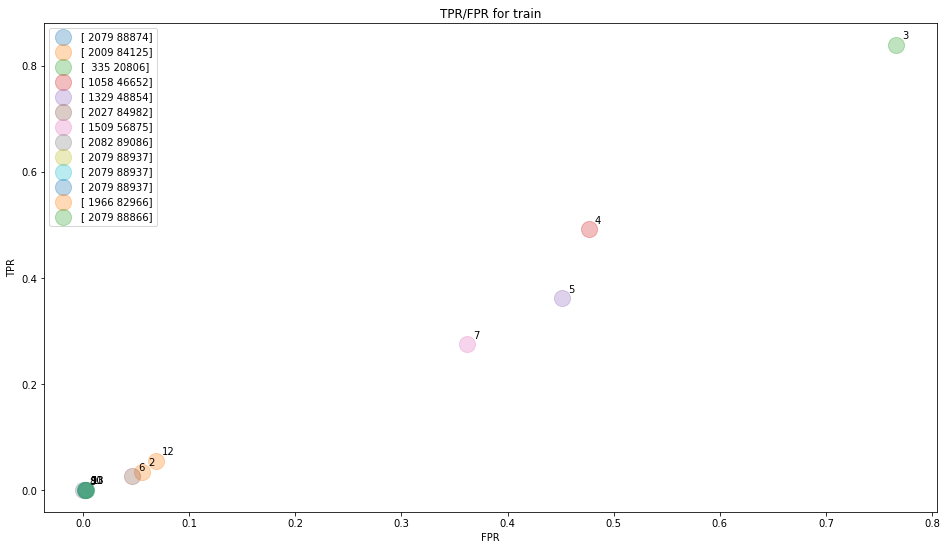

In [8]:
fig, ax = plt.subplots()

for i in indices:
    ax.scatter(x=fpr_train[i], y=tpr_train[i], alpha=0.3, label=names[i], marker='o', s=260)
    ax.annotate(str(i), (fpr_train[i], tpr_train[i]), xytext=(6, 6), textcoords='offset pixels', size=10)

ax.set_title("TPR/FPR for train")
ax.set_ylabel("TPR")
ax.set_xlabel("FPR")
ax.legend()